# EXAMPLES OF REAL CARMENES RV AND TESS LIGHT CURVES

In this notebook we just show two examples of the synthetic RV curves generated from the statistical characteristics of the ML subsample: one for a pulsating star and another one for a non-pulsating star.

## Modules and configuration

### Modules

In [1]:
import pandas as pd

from astropy.table import Table, QTable
from astropy.timeseries import TimeSeries
from astropy import units as u
from astropy.time import Time
from astropy.io import fits

import lightkurve as lk

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white", {'figure.figsize':(15,10)})

### Configuration

In [2]:
# CONFIGURATION:
IMG_FOLDER = "./img/"

DATA_FILE = "../data/SELECTION_for_PG_CARM_VIS_objects_with_PG.csv"
#DATASETS_SUMMARY_FILE = "../data/SYNTH_RV_SAMPLES/RV_FINAL_SyntheticDatasets.csv"
#DS1_FOLDER = "../data/SYNTH_RV_SAMPLES/S1_ts_files/"
#DS2_FOLDER = "../data/SYNTH_RV_SAMPLES/S2_ts_files/"
#DS3_FOLDER = "../data/SYNTH_RV_SAMPLES/S3_ts_files/"
#DS4_FOLDER = "../data/SYNTH_RV_SAMPLES/S4_ts_files/"


### Functions

In [3]:
def rv_load(filename: str):
    '''Load the RV file and returns a lightcurve object'''
    rv_lk = Table.read(filename, format='ascii',
                    names = ['time', 'RV', 'eRV'], units=[u.d, u.meter / u.second, u.meter / u.second])
    rv_lk = lk.LightCurve(time=rv_lk['time'], flux=rv_lk['RV'], flux_err=rv_lk['eRV'])
    return rv_lk

In [4]:
def tess_lc_load(filename: str):
    '''Load the TESS LC file and returns a lightcurve object with just the three relevant columns
    Note: it seems to be necessary to drop 'nan' values for GLS to work properly.'''
    lc_lk = lk.read(filename).remove_nans()
    return lc_lk

## Load data

In [5]:
ds = pd.read_csv(DATA_FILE, sep=',', decimal='.')
ds.head()

,Karmn,Name,Comp,GJ,RA_J2016_deg,DE_J2016_deg,RA_J2000,DE_J2000,l_J2016_deg,b_J2016_deg,...,WF_offset_PG_TESS,WF_e_offset_PG_TESS,WF_FAP_PG_TESS,WF_valid_PG_TESS,WF_error_PG_TESS,WF_elapsed_time_PG_TESS,WF_plain_file_TESS,WF_fig_file_TESS,PG_file_RV,PG_file_TESS
0,J23548+385,RX J2354.8+3831,-,NaN,358.713658,38.526340,23:54:51.46,+38:31:36.2,110.941908,-23.024449,...,999.999756,2.151008e-06,1.0,1.0,NaN,94.758838,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23548+38...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23548+385_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23548+385_RV_PG.dat
1,J23505-095,LP 763-012,-,4367,357.634705,-9.560964,23:50:31.64,-09:33:32.7,80.777067,-67.303426,...,1000.000122,9.022946e-07,1.0,1.0,NaN,132.607176,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23505-09...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23505-095_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23505-095_RV_PG.dat
2,J23431+365,GJ 1289,-,1289,355.781509,36.536310,23:43:06.31,+36:32:13.1,107.922839,-24.336479,...,999.999512,4.306074e-06,1.0,1.0,NaN,97.939914,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23431+36...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23431+365_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23431+365_RV_PG.dat
3,J23381-162,G 273-093,-,4352,354.532687,-16.236514,23:38:08.16,-16:14:10.2,61.845437,-69.825220,...,1000.000122,9.022946e-07,1.0,1.0,NaN,136.603404,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23381-16...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23381-162_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23381-162_RV_PG.dat
4,J23245+578,BD+57 2735,-,895,351.126628,57.853057,23:24:30.51,+57:51:15.5,111.552287,-3.085183,...,999.999512,3.720858e-06,1.0,1.0,NaN,131.327304,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23245+57...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23245+578_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23245+578_RV_PG.dat


In [6]:
print(list(ds.columns))

['Karmn', 'Name', 'Comp', 'GJ', 'RA_J2016_deg', 'DE_J2016_deg', 'RA_J2000', 'DE_J2000', 'l_J2016_deg', 'b_J2016_deg', 'Ref01', 'SpT', 'SpTnum', 'Ref02', 'Teff_K', 'eTeff_K', 'logg', 'elogg', '[Fe/H]', 'e[Fe/H]', 'Ref03', 'L_Lsol', 'eL_Lsol', 'Ref04', 'R_Rsol', 'eR_Rsol', 'Ref05', 'M_Msol', 'eM_Msol', 'Ref06', 'muRA_masa-1', 'emuRA_masa-1', 'muDE_masa-1', 'emuDE_masa-1', 'Ref07', 'pi_mas', 'epi_mas', 'Ref08', 'd_pc', 'ed_pc', 'Ref09', 'Vr_kms-1', 'eVr_kms-1', 'Ref10', 'ruwe', 'Ref11', 'U_kms-1', 'eU_kms-1', 'V_kms-1', 'eV_kms-1', 'W_kms-1', 'eW_kms-1', 'Ref12', 'sa_m/s/a', 'esa_m/s/a', 'Ref13', 'SKG', 'Ref14', 'SKG_lit', 'Ref14_lit', 'Pop', 'Ref15', 'vsini_flag', 'vsini_kms-1', 'evsini_kms-1', 'Ref16', 'P_d', 'eP_d', 'Ref17', 'pEWHalpha_A', 'epEWHalpha_A', 'Ref18', 'log(LHalpha/Lbol)', 'elog(LHalpha/Lbol)', 'Ref19', '1RXS', 'CRT_s-1', 'eCRT_s-1', 'HR1', 'eHR1', 'HR2', 'eHR2', 'Flux_X_E-13_ergcm-2s-1', 'eFlux_X_E-13_ergcm-2s-1', 'LX/LJ', 'eLX/LJ', 'Ref20', 'Activity', 'Ref21', 'FUV_mag',

In [7]:
ds.shape

(269, 300)

## Plot examples

In [8]:
# TRIAL AND ERROR - IN ORDER TO CHOSE A CLEAR EXAMPLE THAT IS SHOWN WELL IN THE PLOT:
CHOSEN_INDEX = 1

In [9]:
ds.loc[CHOSEN_INDEX]

Karmn                                                             J23505-095
Name                                                              LP 763-012
Comp                                                                       -
GJ                                                                      4367
RA_J2016_deg                                                      357.634705
                                                 ...                        
WF_elapsed_time_PG_TESS                                           132.607176
WF_plain_file_TESS         ../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23505-09...
WF_fig_file_TESS           ../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...
PG_file_RV                     ../data/CARM_VIS_RVs_PGs/J23505-095_RV_PG.dat
PG_file_TESS                  ../data/CARM_VIS_TESS_PGs/J23505-095_RV_PG.dat
Name: 1, Length: 300, dtype: object

In [10]:
star_id = ds.loc[CHOSEN_INDEX, 'Karmn']
star_id

'J23505-095'

In [11]:
ds.loc[CHOSEN_INDEX, ['rv_file', 'lc_file']]

rv_file              ../data/CARM_VIS_RVs/J23505-095.avc.dat
lc_file    ../data/CARMENES_GTO_TESS_lc/lightcurves/J2350...
Name: 1, dtype: object

### CARMENES RV time series

We load the CARMENES time series and draw it.

In [12]:
rv_curve = rv_load(ds.loc[CHOSEN_INDEX, 'rv_file'])
rv_curve

time,flux,flux_err
,m / s,m / s
Time,float64,float64
2457594.6752628055,-3.165321775715289,2.4501020106724356
2457606.632775929,-0.9709932775851982,1.765530721327811
2457642.554054242,-3.447762220282078,1.665417271356808
2457652.604834333,-4.520120204052661,1.8581105647983571
2457655.474631772,-7.9064143401873865,1.3802996130972698
2457689.4381131977,-7.833849033291345,1.5811741634495138
2458092.3815138745,-5.410401470918138,1.303100295768838
2458095.3300755816,-2.2579824256354364,1.5565582987408204


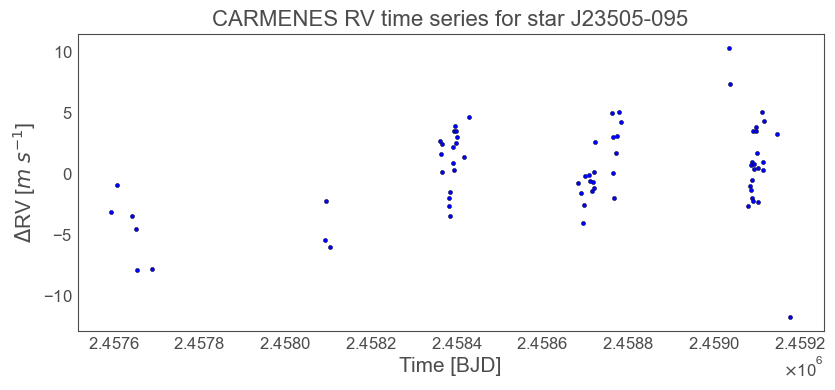

In [13]:
ax = rv_curve.plot(linestyle="", marker='o', color='blue', ms=3, mec='black', mew=0.3)
ax.set_xlabel("Time [BJD]")
ax.set_ylabel("$\Delta$RV [$m\;s^{-1}$]")
ax.set_title("CARMENES RV time series for star %s" %star_id, fontsize=16)

plt.tight_layout()
plt.savefig(IMG_FOLDER + "Analysis_15_01_CARMENES_RV.jpg", format='jpg')
plt.plot();

### _TESS_ light curve

We load the _TESS_ light curve and draw it.

In [14]:
lc_curve = tess_lc_load(ds.loc[CHOSEN_INDEX, 'lc_file'])
lc_curve

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1354.1134987092,7.7882451e+03,1.2840870e+01,5.2930773e-03,91190,267.67399,350.88440,7.2709194e+03,1.0976072e+01,1.5894838e+03,3.8163321e+00,7.7882451e+03,1.2840870e+01,0,———,———,———,———,267.67399,1.1445815e-03,350.88440,1.1460519e-03,5.4082233e-02,1.1634314e-01
1354.1148876538869,7.7615352e+03,1.2827381e+01,5.2931337e-03,91191,267.66605,350.88668,7.2466909e+03,1.0964542e+01,1.5940909e+03,3.8064663e+00,7.7615352e+03,1.2827381e+01,0,———,———,———,———,267.66605,1.1487764e-03,350.88668,1.1485548e-03,4.6161920e-02,1.2272149e-01
1354.1162765985737,7.7906387e+03,1.2843534e+01,5.2931900e-03,91192,267.67933,350.89444,7.2730020e+03,1.0978351e+01,1.5966327e+03,3.8074343e+00,7.7906387e+03,1.2843534e+01,0,———,———,———,———,267.67933,1.1434656e-03,350.89444,1.1479940e-03,6.3671768e-02,1.2742202e-01
1354.119054487945,7.7679834e+03,1.2835590e+01,5.2933027e-03,91194,267.66899,350.90679,7.2491431e+03,1.0971560e+01,1.6007114e+03,3.8091476e+00,7.7679834e+03,1.2835590e+01,0,———,———,———,———,267.66899,1.1492760e-03,350.90679,1.1528846e-03,4.9408056e-02,1.4069748e-01
1354.1204434326319,7.7940537e+03,1.2840253e+01,5.2933590e-03,91195,267.68008,350.87559,7.2686348e+03,1.0975546e+01,1.5897703e+03,3.8051701e+00,7.7940537e+03,1.2840253e+01,0,———,———,———,———,267.68008,1.1456171e-03,350.87559,1.1473708e-03,6.2422529e-02,1.0646008e-01
1354.1218323773187,7.7812422e+03,1.2843363e+01,5.2934154e-03,91196,267.67665,350.88670,7.2673262e+03,1.0978203e+01,1.5963877e+03,3.8096714e+00,7.7812422e+03,1.2843363e+01,0,———,———,———,———,267.67665,1.1443435e-03,350.88670,1.1472964e-03,5.7470709e-02,1.2015462e-01
1354.123221322005,7.7826099e+03,1.2843107e+01,5.2934717e-03,91197,267.67497,350.88664,7.2700986e+03,1.0977984e+01,1.5942877e+03,3.8114197e+00,7.7826099e+03,1.2843107e+01,0,———,———,———,———,267.67497,1.1451839e-03,350.88664,1.1472447e-03,5.4813761e-02,1.2254658e-01
1354.124610266691,7.7327827e+03,1.2824652e+01,5.2935281e-03,91198,267.67226,350.89407,7.2343838e+03,1.0962210e+01,1.5996199e+03,3.8099504e+00,7.7327827e+03,1.2824652e+01,0,———,———,———,———,267.67226,1.1496451e-03,350.89407,1.1497142e-03,5.4372396e-02,1.3084222e-01


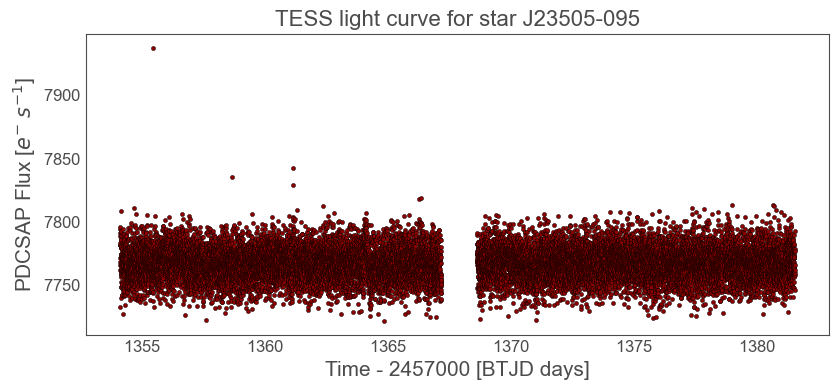

In [15]:
ax = lc_curve.plot(linestyle="", marker='o', color='darkred', ms=3, mec='black', mew=0.3, label=None)
#ax.set_xlabel("Time [BJD]")
ax.set_ylabel("PDCSAP Flux [$e^{-}\;s^{-1}$]")
ax.set_title("TESS light curve for star %s" %star_id, fontsize=16)

plt.tight_layout()
plt.savefig(IMG_FOLDER + "Analysis_15_02_TESS_LC.jpg", format='jpg')
plt.plot();

## Raw RV curve

In [19]:
raw_rv = pd.read_csv(ds.loc[CHOSEN_INDEX, 'rv_file'], sep=' ', decimal='.',
                     header=None, names=['Time', 'RV', 'RV error'])
raw_rv

,Time,RV,RV error
0,2.457595e+06,-3.165322,2.450102
1,2.457607e+06,-0.970993,1.765531
2,2.457643e+06,-3.447762,1.665417
3,2.457653e+06,-4.520120,1.858111
4,2.457655e+06,-7.906414,1.380300
...,...,...,...
66,2.459114e+06,0.944434,3.954870
67,2.459115e+06,0.312324,2.048543
68,2.459116e+06,4.321023,2.922240
69,2.459146e+06,3.254575,1.689112


## Summary

- We have drawn the CARMENES RV and TESS curves for one example star.